In [1]:
import qiskit_metal 

In [2]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.qubits.transmon_pocket_6 import TransmonPocket6
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
import numpy as np
from collections import OrderedDict

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [4]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        all_component_names = design.components.keys()
        if n==1:
            gui.edit_component(['Q1'])
        gui.zoom_on_components(all_component_names)
        if hlt:
            all_component_names = design.components.keys()
            gui.highlight_components(all_component_names)
        gui.screenshot()

In [5]:
def clean():
    design.delete_all_components()

In [6]:
def Three_Qubiteers(a='3 mm'):
    design.overwrite_enabled = True

    options1 = Dict(
        pad_width = '455 um',
        pocket_height = '650um',
        connection_pads= Dict(
            a = Dict(loc_W= +1, loc_H= +1),
            b = Dict(loc_W= -1, loc_H= +1),
            readout = Dict(loc_W= +1, loc_H= -1),
            #d = Dict(loc_W= -1, loc_H= -1),
        ),
        layer = '0'
    )
    options2 = Dict(
        pad_width = '455 um',
        pocket_height = '650um',
        connection_pads= Dict(
            a = Dict(loc_W= +1, loc_H= +1),
            b = Dict(loc_W= -1, loc_H= +1),
            readout = Dict(loc_W= -1, loc_H= -1),
            #d = Dict(loc_W= -1, loc_H= -1),
        ),
        layer = '0'
    )
    s = int(a[0])
    q1 = TransmonPocket(design, 'Q1', options=Dict(pos_x='+0.00mm', pos_y='+1.332mm', orientation = 180, **options1))
    q2 = TransmonPocket(design, 'Q2', options=Dict(pos_x=str(s/2) + 'mm', pos_y='-1.266mm', orientation = 60, **options1))
    q3 = TransmonPocket(design, 'Q3', options=Dict(pos_x=str(-s/2) + 'mm', pos_y='-1.266mm', orientation = 300,  **options2))
    
    guidraw(n=3, hlt=False)

In [7]:
clean()

In [8]:
design.chips.main.size.size_x='5 mm'
design.chips.main.size.size_y='5 mm'

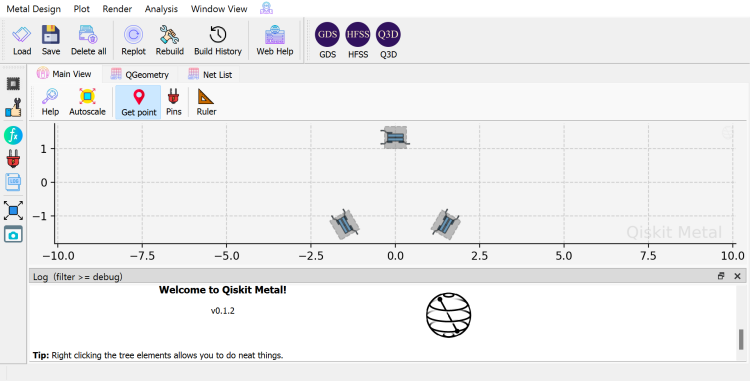

In [9]:
Three_Qubiteers()

In [10]:
def Print_RM_Options():
    opt = RouteMeander.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [11]:
def Print_RS_Options():
    opt = RouteStraight.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [12]:
def Print_RMix_Options():
    opt = RouteMixed.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [13]:
#Print_RM_Options()
Print_RMix_Options()

chip - main
layer - 1
pin_inputs - {'start_pin': {'component': '', 'pin': ''}, 'end_pin': {'component': '', 'pin': ''}}
fillet - 0
lead - {'start_straight': '0mm', 'end_straight': '0mm', 'start_jogged_extension': '', 'end_jogged_extension': ''}
total_length - 7mm
trace_width - cpw_width
meander - {'spacing': '200um', 'asymmetry': '0um'}
snap - true
prevent_short_edges - true
anchors - {}
advanced - {'avoid_collision': 'true'}
step_size - 0.25mm
between_anchors - {}
hfss_wire_bonds - False
q3d_wire_bonds - False


In [14]:
ops = Dict(fillet='90um', layer=1)

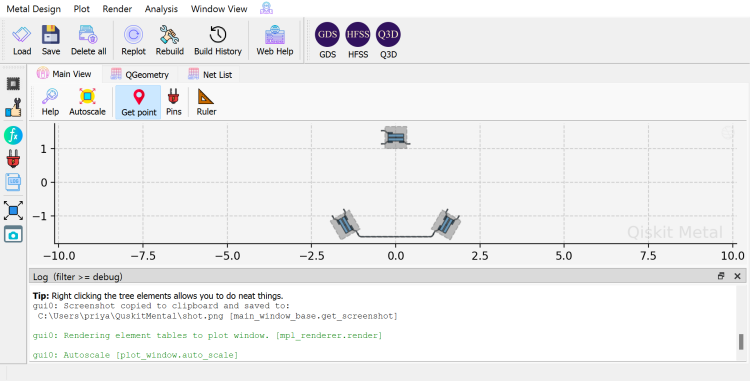

In [15]:
options= Dict(
    total_length = '9mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q2',
            pin = 'b'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'a'
        )
    ),
    lead= Dict(
        start_straight = '0.09mm',
        end_straight = '0.09mm'
    ),
    meander = Dict(asymmetry='-0.0mm'),
    #layer = '0',
    **ops
)

try:
    cpw3.delete()
except NameError: pass

cpw3 = RouteStraight(design, options=options)
guidraw(n=3)

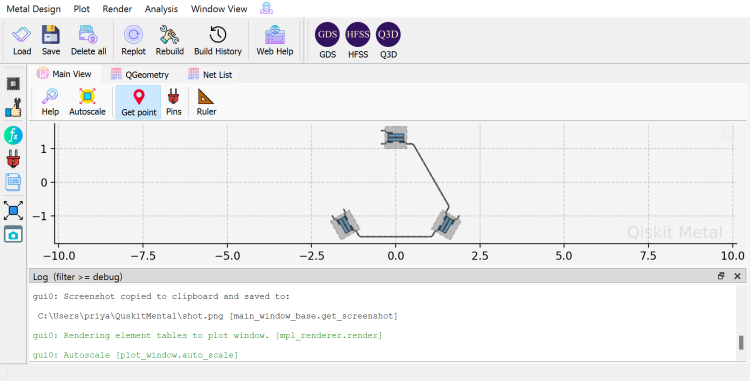

In [16]:
anchors = OrderedDict()
bw_anchors = OrderedDict()

#for x in range(50, 100):
#    y = -np.sqrt(3) * (x/100- 0.42) + 2.4
#    anchors[x-50] = np.array([x/100, y])
#    bw_anchors[x-50] = "S"
#bw_anchors[100-50] = "M"

anchors[0] = np.array([0.71, 1.9])
#anchors[1] = np.array([1, np.sqrt(3)/2])
bw_anchors[0] = "M"
bw_anchors[1] = "M"


options= Dict(
    total_length = '19mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'b'
        ),
        end_pin = Dict(
            component = 'Q2',
            pin = 'a'
        )
    ),
    anchors = anchors,
    between_anchors = bw_anchors,
    advanced = Dict(avoid_collision = 'true'),
    lead= Dict(
        start_straight = '0.09mm',
        end_straight = '0.09mm'
    ),
    meander = Dict(asymmetry='0.0mm'),
    meander_angle= 60,
    #layer = '0',
    **ops
)

try:
    cpw2.delete()
except NameError: pass

cpw2 = RouteStraight(design, options=options)
guidraw(n=3)

In [ ]:
options = Dict(
    total_length = '9mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'a'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin=  'b'
        )
    ),
    #anchors = anchors,
    #between_anchors = bw_anchors,
    advanced = Dict(avoid_collision = 'true'),
    lead = Dict(
        start_straight = '0.09mm',
        end_straight = '0.09mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        #spacing= '50um',
        asymmetry = '-0.5mm'
    ),
    #layer = '0',
    **ops
)

try:
    cpw.delete()
except NameError: pass

cpw = RouteStraight(design, options = options)

guidraw(n=3)

In [ ]:
CoupledLineTee.get_template_options(design)

In [ ]:
TQ3 = CoupledLineTee(design, 'TQ3', options=dict(pos_x='-2mm',
                                             pos_y='4mm',
                                             coupling_length='200um', layer='0'))
TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-0.5mm',
                                             pos_y='4mm',
                                             coupling_length='200um', layer='0'))
TQ2 = CoupledLineTee(design, 'TQ2', options=dict(pos_x='2.0mm',
                                             pos_y='4mm',
                                             coupling_length='200um', layer='0'))

guidraw(n=3)

In [ ]:
ops=dict(fillet='90um')
design.overwrite_enabled = True

options1 = Dict(
    total_length='9mm',
    layer='0',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component='TQ1',
            pin='second_end'),
        end_pin=Dict(
            component='Q1',
            pin='readout')),
    lead=Dict(
        start_straight='0.1mm'),
    **ops
)

options2 = Dict(
    total_length='20mm',
    layer='0',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component='TQ2',
            pin='second_end'),
        end_pin=Dict(
            component='Q2',
            pin='readout')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight = '0.1mm'
    ),
    meander = Dict(asymmetry='+0.3mm'),
    **ops
)

options3 = Dict(
    total_length='20mm',
    layer='0',
    hfss_wire_bonds = True,
    pin_inputs=Dict(
        start_pin=Dict(
            component='TQ3',
            pin='second_end'),
        end_pin=Dict(
            component='Q3',
            pin='readout')),
    lead=Dict(
        start_straight='0.1mm',
        end_straight = '0.1mm'
    ),
    meander = Dict(asymmetry='-0.5mm'),
    **ops
)
meanderQ1 = RouteMeander(design, 'meanderQ1', options=options1)
meanderQ2 = RouteMeander(design, 'meanderQ2', options=options2)
meanderQ3 = RouteMeander(design, 'meanderQ3', options=options3)

gui.rebuild()
gui.autoscale()

In [ ]:
otg1 = OpenToGround(design, 'otg1', options = Dict(pos_x='4.5mm', 
                                                   pos_y='4mm',layer='0'))
otg2 = OpenToGround(design, 'otg2', options = Dict(pos_x = '-4.5mm', 
                                                   pos_y='4mm', 
                                                   orientation='180',layer='0',))

gui.rebuild()
gui.autoscale()

In [ ]:
ops_oR = Dict(hfss_wire_bonds = True,
              layer='0',
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_end'),
                 end_pin=Dict(
                     component='otg1',
                     pin='open')))
ops_mid = Dict(hfss_wire_bonds = True,
               layer='0',
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))
ops_oL = Dict(hfss_wire_bonds = True,
              layer='0',
              pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ2',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='otg2',
                     pin='open')))

cpw_openRight = RouteStraight(design, 'cpw_openRight', options=ops_oR)
cpw_middle = RouteStraight(design, 'cpw_middle', options=ops_mid)
cpw_openLeft = RouteStraight(design, 'cpw_openLeft', options=ops_oL)

gui.rebuild()
gui.autoscale()